# Modeling and simulation of complex systems

In [1]:
# 1. Subject: how do you see it? - and Hypothesis
# 2. Model (what kind of model you choose? - can use UML diagram) | Explain the UML and explain what choice did you made? like why virus is an agent and sth like that
# 3. Doc on base model (User documentation of the model)
# 4. Extentions - what did you add to the model (4a, 4b, 4c)
# 5. General conclusion

\break

In [2]:
%config InlineBackend.figure_formats = ['svg']

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

plt.rcParams['font.family'] = 'Latin Modern Roman'

DPI = 800

%matplotlib inline

In [3]:
# import matplotlib

# [f.name for f in matplotlib.font_manager.fontManager.ttflist]

## Introduction

### Requirements and assumptions

This project is for modelling and simulation of a system that involves a forest-pasture ecosystem with goats and sheperds. As a summary, the requirements of the assignment are:

- **Environment description**:

	- Grazing involves sheperds and goats.
	- Dominant tree species: Cormasis gama, forming groves within the pasture.
	- The goats prefer forest (or tree groves) for feeding but grazing reduces forest cover to pasture.

    *From here, the following assumptions are made:*

	- Each sheperd owns a herd of goats, and all goats in a herd have the same grazing behavior.
	- The pasture is a 2D grid, with each cell representing a unit area of the pasture.
	- Each cell can be either a tree grove or pasture, and the state of each cell can change over time.

- **Grazing dynamic**:

    - Tree groves can recolonize edge/fringe areas with a monthly probability (0.0025 to 0.02) based on their surrounding abundance.
    - Grazing is shepherd-controlled, influenced by memory and their respect for Forest Department regulations.
    - Grazing season is 10 months; shepherds choose grazing spots based on past experiences and available space.

    *From here, the following assumptions are made:*

	- Each goat has a grazing capacity, which is the amount of forest that it can consume in a cycle (1 week).
    - The recolonization of the tree groves can be intepreted as the probablity that neighboring groves will spread seed. If a cell has no tree, the seed might be spread, take root and start growing.


- **Shepherd behavior and regulation**:

    - Shepherds track forest visibility over the season to set a "self-authorized minimum size" for grove grazing.
    - This individual threshold is recalibrated each season based on the previous season's forest perception.
    - Post-season, the Forest Department sets an "institutional-authorized minimum size" based on shepherd reports, marking smaller groves as protected.

    *From here, the following assumptions are made:*



- **Compliance**:

    - Respectful shepherds follow Forest Department's protected grove designations.
    - Disrespectful shepherds ignore regulations, basing decisions solely on personal criteria.

The methodology of the project is based on building an agent-based model to simulate the goat-forest ecosystem, and then to analyze the results of the simulation to understand the dynamics of the system, particularly with respect to the impact of the goat's grazing behavior and the tree's growth and recolonization.

### Hypothesis

To formulate a goal for the project, there are 3 different scenarios that need to be considered:

1. All shepherds were to enter the forest without any regulation, i.e. there is both no self-authorized minimum size and no institutional minimum size.
2. All shepherds were to follow their idea about the minimum size, i.e. the institutional minimum size is completely ignored.
3. All shepherds were to follow the institutional minimum size i.e. the institutional minimum size is strictly followed.

The hypothesis is that the third scenario will result in the best outcome for the forest, as the forest will be protected from overgrazing and the trees will have a chance to recolonize the pasture. The first scenario will result in the worst outcome, as the forest will be overgrazed and the trees will not have a chance to recolonize the pasture. The second scenario will result in an outcome that is better than the first scenario, but worse than the third scenario, as the forest will be overgrazed, but the trees will have a chance to recolonize the pasture. However, we might also need to consider the potential impact of a very high forecast coverage, as it might result in a decrease in the pasture area, which might have a negative impact on the goats. As such, batch simulation can be used to test the impact of various parameters on the system, and to optimize for a reasonable level of forest coverage.

### Metrics

From the hypotheis, we can define the following metrics that can be used to analyse and monitor during the simulation:

- **Forest coverage** (percentage): The percentage of the pasture that is covered by trees. A grove is counted towards the forest coverage if it is fully grown. This will be the primary metric to monitor the impact of the sheperd's behavior on the forest.
- **Average self-authorized minimum size** (month): The average size of the forest that the shepherds are willing to graze. This is also the institutional minimum size.
- **Grove size** (month): The size of the forest groves in the pasture, defined as the number of months that the grove has been growing since a seed was planted. We calculate this metric by month to make it possible to compare this with the self-authorized minimum size of the sheperds.


## Model

### Overview

![Overview of the model and its entities](images/model-rls.svg){#fig-model-rls}

### Environment

#### Global

![Global set up](images/fig-global-class.svg){#fig-global-class}


#### Pasture and Forest

![Grid of pasture cells](images/fig-pasture-class.svg){#fig-pasture-class}

::: {#fig-compare-grid layout-ncol=2}
![The pasture grid at cycle 0](images/sheperd_model_display_grid_cycle_0.png){#fig-pasture-grid width="300"}

![Tree groves changing color based on growth](images/sheperd_model_display_grid_cycle_82.png){#fig-pasture-grid width="300"}

Tree groves at cycle 0 and 82. 

:::

### Assumptions and description for the agents

#### Goat species

The goats are the primary agents in the model, as they are responsible for grazing the pasture. There are two main types of goats: respectful and disrespectful, each with a different color (blue and red respectively as shown in @fig-goats). Besides that, if there is no regulation in the simulation, goats will have a different color (purple) to emphasize the neutral nature of the simulation. Goats are set up in GAMA as a species (see @fig-goat-class) with the following attributes:

![Goat species](images/fig-goat-class.svg){#fig-goat-class}

::: {#fig-goats layout-ncol=3}
![Respectful goat](../model/includes/respectful_goat.png){#fig-respectful-goat width="140"}

![Disrespectful goat](../model/includes/disrespectful_goat.png){#fig-disrespectful-goat width="140"}

![Goat with no regulation](../model/includes/neutral_goat.png){#fig-no-reg-goat width="140"}


Colors of the goats based on sheperd behavior.

:::

#### Sheperd species

![Sheperd species](images/fig-sheperd-class.svg){#fig-sheperd-class}

## User documentation

In order to run the model, the user needs to have the GAMA Platform installed. The model is implemented in GAML, which is the language used by GAMA. The user can run the model by copying the subdirectories in the `./model` to

## Analysis

### Simulation

The simulation is run and paused at the 720th month, and with 3 different scenarios. The results of the simulation are then analyzed to understand the impact of the different scenarios on the forest and pasture. @fig-cov-ts shows the time series of the forest coverage for these 3 scenarios.

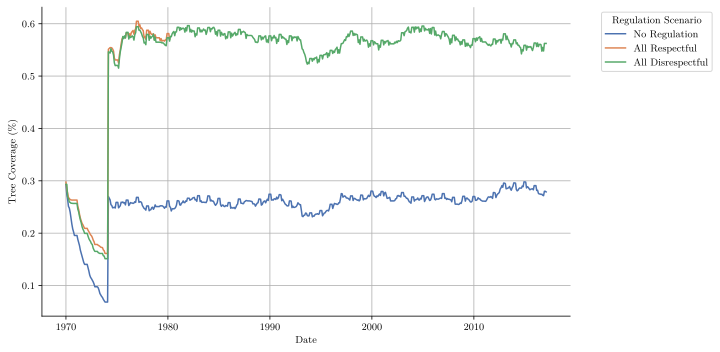

In [5]:
#| label: fig-cov-ts
#| fig-cap: "Tree Coverage by Regulation Scenario over 60 years"


no_reg = pd.read_csv("../model/models/results_no_regulation.csv")
respect = pd.read_csv("../model/models/results_all_respectful.csv")
disrespect = pd.read_csv("../model/models/results_all_disrespectful.csv")


no_reg["ds"] = pd.to_datetime(no_reg["current_date.year"].astype(str) + "-" + no_reg["current_date.month"].astype(str) + "-1")
respect["ds"] = pd.to_datetime(respect["current_date.year"].astype(str) + "-" + respect["current_date.month"].astype(str) + "-1")
disrespect["ds"] = pd.to_datetime(disrespect["current_date.year"].astype(str) + "-" + disrespect["current_date.month"].astype(str) + "-1")

data = pd.DataFrame({
    "Date": no_reg["ds"],
    "No Regulation": no_reg["tree_cov"],
    "All Respectful": respect["tree_cov"],
    "All Disrespectful": disrespect["tree_cov"]
})

data_long = data.melt('Date', var_name='Regulation', value_name='Tree Coverage')

plt.figure(figsize=(12, 5), dpi=DPI)
chart = sns.lineplot(data=data_long, x='Date', y='Tree Coverage', hue='Regulation', palette='deep')

# plt.title('Tree Coverage Over Time by Regulation Scenario', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Tree Coverage (%)')
# plt.xticks(rotation=45)

plt.legend(title='Regulation Scenario', loc='upper left', bbox_to_anchor=(1.05, 1))

sns.despine()
plt.grid()
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

@tbl-avg-cov also shows the average forest coverage over time for these 3 scenarios. From both this data and @fig-cov-ts, we can see that:

- Forest coverage is the highest when there is no regulation at all: This is a reasonable outcome, since the goats are free to roam and graze as they please, and the trees are not protected from overgrazing.
- Forest coverage is the lowest when the sheperds are respectful i.e. they strictly follow the institutional minimum size: This is also a reasonable outcome, since the trees are protected from overgrazing with a global minimum size. However, the tree coverage in this scenario is not much higher than the **disrespectful** scenario where all sheperds ignore the regulations. This is likely because the global minimum size is simply an average of the self-authorized minimum size, and does not have a significant impact on the forest coverage.

In [6]:
#| label: tbl-avg-cov
#| tbl-cap: "Average Tree Coverage by Regulation Scenario over 60 years"


pd.DataFrame({
	"Scenario": ["There is no Regulation", "All sheperds are disrespectful", "All sheperds are respectful"],
	"Avg. Tree Coverage": [no_reg["tree_cov"].mean(), disrespect["tree_cov"].mean(), respect["tree_cov"].mean()]
})

,Scenario,Avg. Tree Coverage
0,There is no Regulation,0.252454
1,All sheperds are disrespectful,0.543203
2,All sheperds are respectful,0.424598


### Calibration

In an ecosystem like this where there are different agents and entities interacting with each other, it can be useful to explore the impact of different parameters on the system. With GAMA, we can set up the optimization experiment with the following configuration:

- **Objective function**: To minimize the absolute difference between the forest coverage and 0.6, i.e. to find the parameters that result in a forest coverage of 0.6. This is to mimic the real-world scenario where a healthy forest coverage is desired, but an excessive forest coverage might have a negative impact on the pasture area and the goat population, and by extension, the human population that depends on the goats for food and income.
- **Optimization method**: We use the Tabu Search algorithm with:
	- `iter_max`: 10
	- `tabu_list_size`: 3
- **Parameter search space** (these are the parameters that have potential impact on the system): as shown in @tbl-param.

In [7]:
#| label: tbl-param
#| tbl-cap: "Parameter Space"

pd.DataFrame({
	"Parameter": ["The probability of tree recolonization", "The grazing capacity of the goats", "The number of respectful sheperds"],
	"Max": [0.125, 1.0, 10],
	"Min": [0.0005, 0.1, 0]
})

,Parameter,Max,Min
0,The probability of tree recolonization,0.125,0.0005
1,The grazing capacity of the goats,1.000,0.1000
2,The number of respectful sheperds,10.000,0.0000


As for the probability of tree recolonization (or seed spreading and taking root): This is the minimum probability in the case that there is only one neighboring tree grove in the 8 neighboring cells. As such, the maximum probability is 8 times the minimum probability, i.e. 0.004 to 1.0.

Using these parameters, we can set up the optimization experiment to find the parameters that result in a forest coverage that is closest to 0.6. The results of the calibration is shown in @tbl-optim.

In [8]:
#| label: tbl-optim
#| tbl-cap: "Optimization results"

calib_result = pd.read_csv("../model/models/optim.csv")

calib_result.assign(diff=0.6 - calib_result["tree_cov"]).query("diff < 0.01")[["tree_cov", "n_respectful_sheperd", "goat_eating_cap", "min_spread_seed_proba"]].drop_duplicates().rename(columns={"tree_cov": "Tree Cov.", "n_respectful_sheperd": "No. of Respectful Sheperds", "goat_eating_cap": "Grazing Capacity", "min_spread_seed_proba": "Min Seed Spreading Prob."}).sort_values("Tree Cov.", ascending=False).reset_index(drop=True)

,Tree Cov.,No. of Respectful Sheperds,Grazing Capacity,Min Seed Spreading Prob.
0,0.6080,10,0.4,0.0065
1,0.6080,10,0.4,0.0070
2,0.6080,10,0.4,0.0075
3,0.5996,8,0.4,0.0065
4,0.5996,8,0.4,0.0075


## Conclusion

### Discussion

### Future works